In [1]:
from urllib.request import urlretrieve

In [2]:
url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7f1a1ccee1f0>)

In [3]:
#importing imp libs

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
%matplotlib inline

In [4]:
##Setting the charts characters
sns.set_style('white')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [5]:
df = pd.read_csv('medical.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
fig = px.histogram(df,x='age',
                   marginal='box',nbins=17,title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

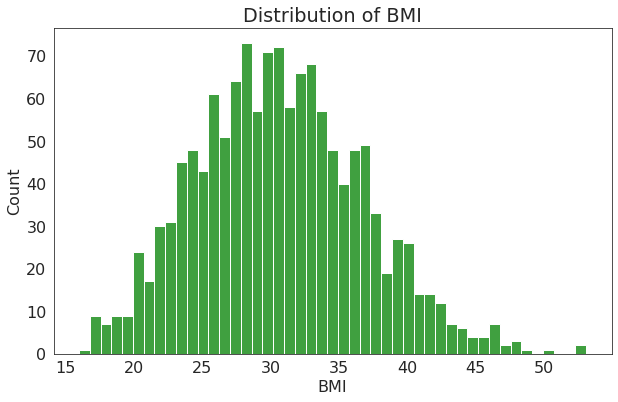

In [10]:
fig = sns.histplot(data=df,x='bmi',bins=47,color='green')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.show()

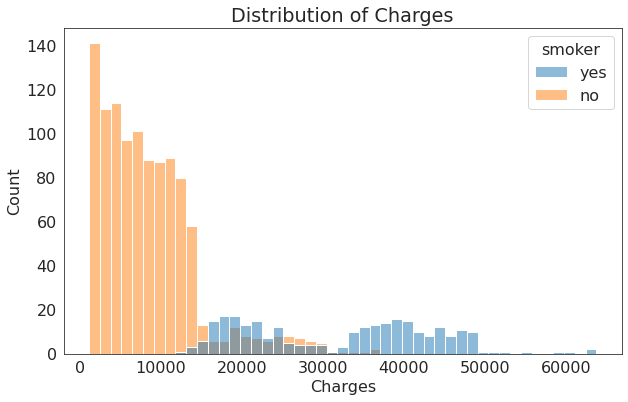

In [11]:
fig = sns.histplot(data=df,x='charges',bins=47,hue='smoker')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.show()

In [18]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

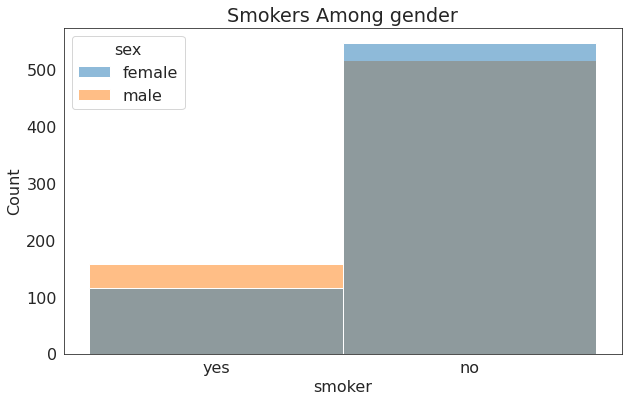

In [12]:
fig = sns.histplot(data=df,x='smoker',hue='sex')
plt.title('Smokers Among gender')
plt.show()

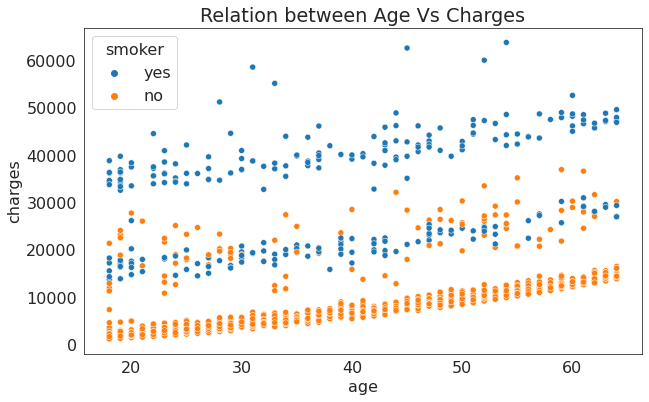

In [13]:
##Checking the relation between the variables

fig = sns.scatterplot(data=df,x='age',y='charges',hue='smoker')
plt.title('Relation between Age Vs Charges')
plt.show()

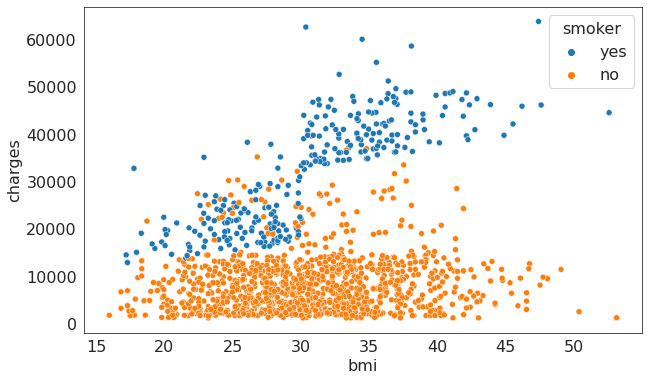

In [14]:
fig = sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker')
plt.show()

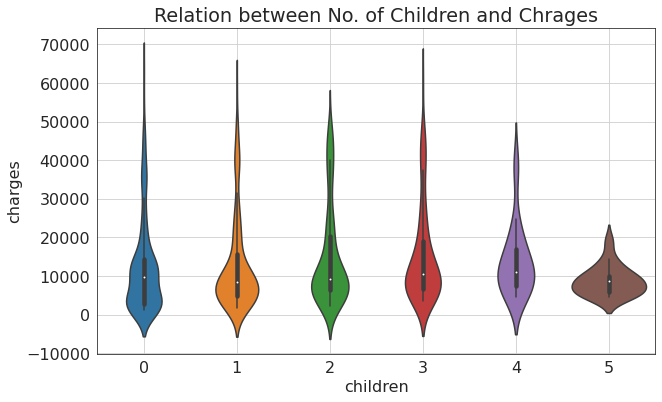

In [42]:
fig = sns.violinplot(data=df,x='children',y='charges')
plt.title('Relation between No. of Children and Chrages')
plt.grid(True)
plt.show()

In [43]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [44]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

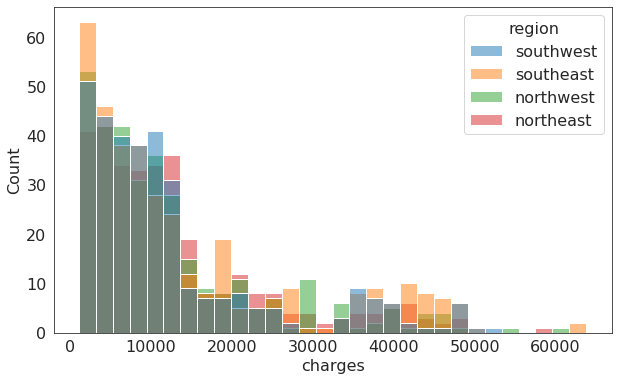

In [50]:
fig = sns.histplot(data=df,x='charges',hue='region')

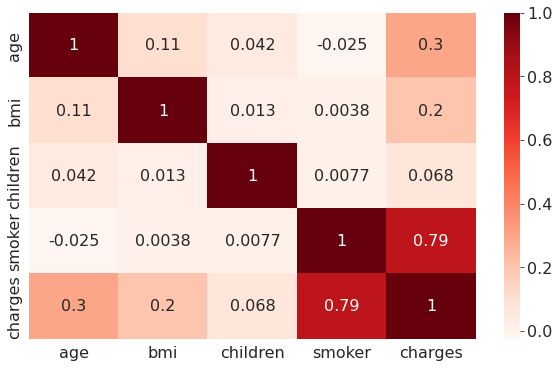

In [56]:
fig = sns.heatmap(df.corr(),annot=True,cmap='Reds')

In [55]:
smoker_numeric = {'no':0,'yes':1}
df['smoker'] = df['smoker'].map(smoker_numeric)


In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Linear Regression for single variable.

In [18]:
from sklearn.model_selection import train_test_split
features = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
target = df['charges']

In [21]:
print("Features Size: ",features.shape)
print("Target Size: ", target.shape)

Features Size:  (1338, 6)
Target Size:  (1338,)


In [22]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)
print("Train Size: ", x_train.shape)
print("Test Size: ", x_test.shape)
print("Train Tr Size: ", y_train.shape)
print("Test Tr Size: ", y_test.shape)

Train Size:  (936, 6)
Test Size:  (402, 6)
Train Tr Size:  (936,)
Test Tr Size:  (402,)


In [29]:
non_smoker_data = df[df['smoker']=='no']

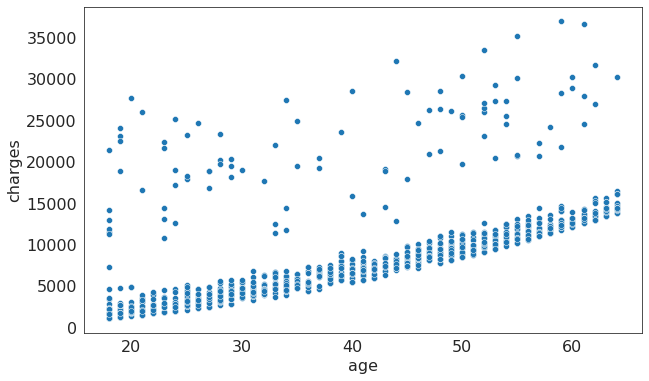

In [30]:
fig = sns.scatterplot(data=non_smoker_data, x='age',y='charges')

In [32]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

In [48]:
x_train_single = x_train[['age']]
x_test_single  = x_test[['age']]

In [35]:
linear.fit(x_train_single,y_train)

LinearRegression()

In [36]:
linear.coef_

array([247.59955092])

In [37]:
linear.intercept_

3673.8368753317463

In [44]:
prediction = linear.predict(x_train_single)

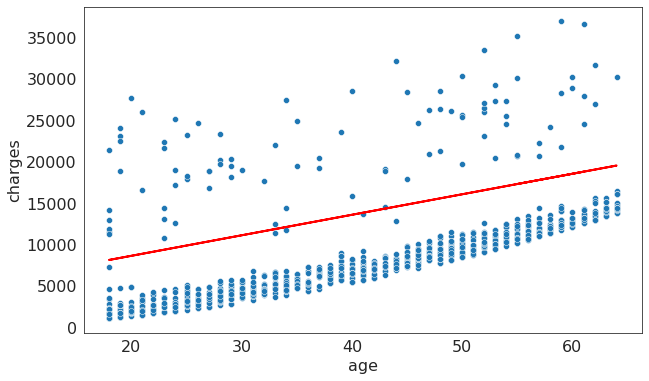

In [46]:
sns.scatterplot(data=non_smoker_data,x='age',y='charges')
plt.plot(x_train_single, prediction,'r', linewidth=2)
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
pred = linear.predict(x_test_single)

In [50]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test,pred))
print("RMSE: ",rmse)

RMSE:  11474.381724097713


In [58]:
##Splitting the data into smoker and non-smoker data

smoker_data = df[df['smoker']=='no']
non_smoker_data = df[df['smoker']=='yes']

In [59]:
print("Smoker_data: ", smoker_data.shape)
print("Non Smoker_data: ", non_smoker_data.shape)

Smoker_data:  (1064, 7)
Non Smoker_data:  (274, 7)


In [111]:
#Modelling on Smoker_data
x_train_smoke,x_test_smoke,y_train_smoke,y_test_smoke = train_test_split(smoker_data.iloc[:,:-1],smoker_data.iloc[:,-1],test_size=0.30,random_state=42)

x_train_non_smoke,x_test_non_smoke,y_train_non_smoke,y_test_non_smoke = train_test_split(non_smoker_data.iloc[:,:-1],non_smoker_data.iloc[:,-1],test_size=0.30,random_state=42)

In [71]:
print(x_train_smoke.shape, x_test_smoke.shape,y_train_smoke.shape,y_test_smoke.shape)
print(x_train_non_smoke.shape,x_test_non_smoke.shape,y_train_non_smoke.shape,y_test_non_smoke.shape)

(744, 6) (320, 6) (744,) (320,)
(191, 6) (83, 6) (191,) (83,)


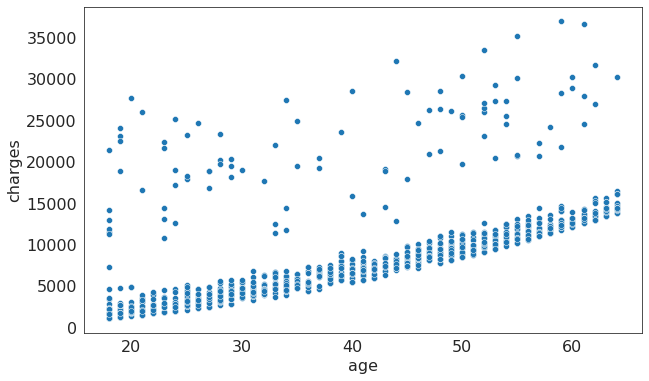

In [75]:
sns.scatterplot(data=smoker_data,x="age",y="charges")
plt.show()

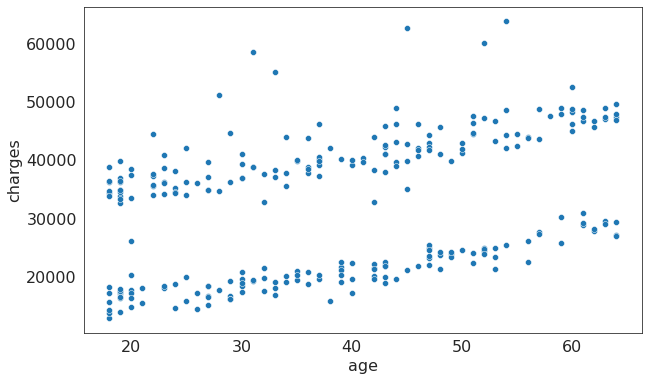

In [77]:
sns.scatterplot(data=non_smoker_data,x="age",y="charges")
plt.show()

In [80]:
linear.fit(x_train_non_smoke[['age']],y_train_non_smoke)

LinearRegression()

In [81]:
print(linear.coef_,linear.intercept_)

[296.29854246] 19843.09275209171


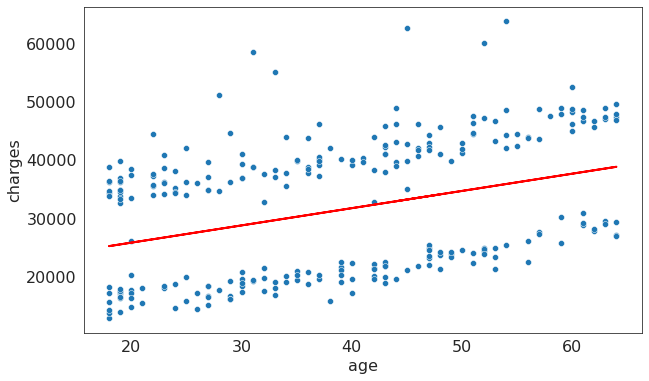

In [82]:
pred = linear.predict(x_train_non_smoke[['age']])
sns.scatterplot(data=non_smoker_data,x="age",y="charges")
plt.plot(x_train_non_smoke[['age']],pred,'r',linewidth=2)
plt.show()

In [83]:
prediction = linear.predict(x_test_non_smoke[['age']])
rmse = np.sqrt(mean_squared_error(y_test_non_smoke,prediction))
print("RMSE: ",rmse)

RMSE:  11432.330051835095


Multiple Linear Regression

In [85]:
linear.fit(x_train_smoke[['age','bmi']],y_train_smoke)
print(linear.coef_,linear.intercept_)

[260.59548655  23.46042226] -2528.0079992905503


In [86]:
pred = linear.predict(x_test_smoke[['age','bmi']])
rmse = np.sqrt(mean_squared_error(y_test_smoke,pred))
print("RMSE: ",rmse)

RMSE:  4418.149482630137


For Non Smoking Data

In [87]:
linear.fit(x_train_non_smoke[['age','bmi']],y_train_non_smoke)
print(linear.coef_,linear.intercept_)
pred = linear.predict(x_test_non_smoke[['age','bmi']])
rmse = np.sqrt(mean_squared_error(y_test_non_smoke,pred))
print("RMSE: ",rmse)

[ 246.75429877 1528.83919353] -24640.96562995345
RMSE:  6783.510953537892


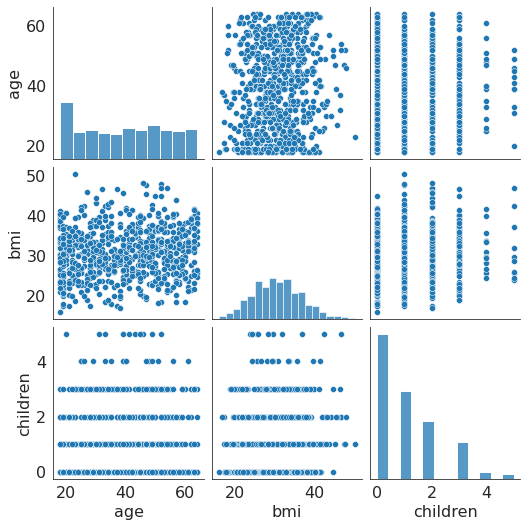

In [90]:
columns = ['age','bmi','children']
sns.pairplot(x_train_smoke[columns])

In [92]:
linear.fit(x_train_smoke[['age','bmi','children']],y_train_smoke)
print(linear.coef_,linear.intercept_)
pred = linear.predict(x_test_smoke[['age','bmi','children']])
rmse = np.sqrt(mean_squared_error(y_test_smoke,pred))
print("RMSE: ",rmse)

[258.75268072  19.547852   586.46478978] -2969.9529827640017
RMSE:  4359.739740377719


In [93]:
linear.fit(x_train_non_smoke[['age','bmi','children']],y_train_non_smoke)
print(linear.coef_,linear.intercept_)
pred = linear.predict(x_test_non_smoke[['age','bmi','children']])
rmse = np.sqrt(mean_squared_error(y_test_non_smoke,pred))
print("RMSE: ",rmse)

[ 245.97761281 1529.94413323  109.12681548] -24764.9535101158
RMSE:  6777.227499121162


In [112]:
sex_cat = {'male':0,'female':1}
x_train_smoke['sex'] = x_train_smoke['sex'].map(sex_cat)

x_test_smoke['sex'] = x_test_smoke['sex'].map(sex_cat)

x_train_non_smoke['sex'] = x_train_non_smoke['sex'].map(sex_cat)

x_test_non_smoke['sex'] = x_test_non_smoke['sex'].map(sex_cat)

In [102]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
onehot.fit(x_train_smoke[['region']])
onehot.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [103]:
onevec = onehot.transform(x_train_smoke[['region']]).toarray()

onevec


array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [113]:
x_train_smoke[['northeast','northwest','southeast','southwest']]=onevec

In [114]:
x_train_smoke

,age,sex,bmi,children,smoker,region,northeast,northwest,southeast,southwest
6,46,1,33.44,1,no,southeast,0.0,0.0,1.0,0.0
398,64,0,25.60,2,no,southwest,0.0,0.0,0.0,1.0
1116,41,0,29.64,5,no,northeast,1.0,0.0,0.0,0.0
138,54,1,31.90,3,no,southeast,0.0,0.0,1.0,0.0
131,61,1,22.04,0,no,northeast,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
425,45,0,24.31,5,no,southeast,0.0,0.0,1.0,0.0
582,39,0,45.43,2,no,southeast,0.0,0.0,1.0,0.0
164,37,0,29.64,0,no,northwest,0.0,1.0,0.0,0.0
1315,18,0,28.31,1,no,northeast,1.0,0.0,0.0,0.0


In [115]:
onehot.fit(x_test_smoke[['region']])

OneHotEncoder()

In [116]:
onevec = onehot.transform(x_test_smoke[['region']]).toarray()
x_test_smoke[['northeast','northwest','southeast','southwest']] = onevec

In [117]:
onehot.fit(x_train_non_smoke[['region']])
onevec = onehot.transform(x_train_non_smoke[['region']]).toarray()
x_train_non_smoke[['northeast','northwest','southeast','southwest']] = onevec

In [118]:
onehot.fit(x_test_non_smoke[['region']])
onevec = onehot.transform(x_test_non_smoke[['region']]).toarray()
x_test_non_smoke[['northeast','northwest','southeast','southwest']] = onevec

For Smoking data, by adding Region feature.

In [120]:
linear.fit(x_train_smoke[['age','bmi','children','northeast','northwest','southeast','southwest']],y_train_smoke)
print(linear.coef_,linear.intercept_)
pred = linear.predict(x_test_smoke[['age','bmi','children','northeast','northwest','southeast','southwest']])
rmse = np.sqrt(mean_squared_error(y_test_smoke,pred))
print("RMSE: ",rmse)

[ 258.92852838   34.40100523  587.75344128  783.3114967   238.71961918
 -387.24813508 -634.7829808 ] -3434.3203809558163
RMSE:  4341.327353703288


For Non-Smoking data, by adding Region feature.

In [121]:
linear.fit(x_train_non_smoke[['age','bmi','children','northeast','northwest','southeast','southwest']],y_train_non_smoke)
print(linear.coef_,linear.intercept_)
pred = linear.predict(x_test_non_smoke[['age','bmi','children','northeast','northwest','southeast','southwest']])
rmse = np.sqrt(mean_squared_error(y_test_non_smoke,pred))
print("RMSE: ",rmse)

[  248.79512435  1564.04681786   102.09338977  1071.07837552
   290.25145421 -1215.52528647  -145.80454326] -25824.37828589841
RMSE:  6773.138052888104


By Looking multiple linear models, we can say that charges are mainly dependent on AGE and BMI. Though adding Children and Region models imporved a bit, but not significance to consider.